# Predict Customer Clicked Ads Classification By Using Machine Learning

Name : Azarya Yehezkiel Pinondang Sipahutar

**Project Overview**:
A company in Indonesia wants to know the effectiveness of their advertisements. It is essential for companies operating in the digital marketing consultant sector to find out how successful the advertisements they are marketing are so that they can attract customers to see the advertisements. In this mini project, I am responsible for looking for insights regarding user behaviour from this data by creating visualizations, creating machine learning relevant to the company's needs, and making recommendations from the findings obtained.

**Project Goals**<br>
Knowing the effectiveness of the advertisements displayed and the success of the advertisements being marketed allows them to optimize the way the company advertises on the internet and attract customers to see the advertisements.<br><br>

**Objective** <br> 
1. Find insights.

2. Clean data

3. Develop models.

4. Make business recommendations: 


## Task 1 - Customer Type And Behaviour Analysis On Advertisement
**Task Goals** :<br> Understand the characteristics and behaviors of customers in relation to advertisements.<br><br>

**Task Objective** :<br> 
- EDA (Exploratory Data Analysis) to find insights from the data.
- Univariate analysis to find insights from the data.
- Bivariate analysis to find insights from the data.
- Multivariate analysis to find insights from the data.
- Create visualizations to support the insights.

### Import Library

```python
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
```

In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score, KFold, StratifiedKFold, cross_validate
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, cross_val_score, KFold, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

### Load Dataset & Premilinary Data Checking

In [87]:
df = pd.read_csv('./data/Clicked Ads Dataset.csv')
display(df.sample(4))

,Unnamed: 0,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Timestamp,Clicked on Ad,city,province,category
205,205,58.22,29,261416680.0,120.90,Perempuan,2/11/2016 2:40,Yes,Tangerang Selatan,Banten,Furniture
66,66,63.89,40,359221310.0,105.22,Perempuan,1/8/2016 0:17,Yes,Cimahi,Jawa Barat,Fashion
103,103,68.18,21,338632980.0,218.17,Laki-Laki,2/9/2016 22:04,No,Surabaya,Jawa Timur,Travel
518,518,59.22,55,273920710.0,126.39,Laki-Laki,1/13/2016 2:39,Yes,Medan,Sumatra Utara,Otomotif


### Metadata
Column Name | Description
--- | ---
`daily_time_spent_on_site` | This is a numerical field that represents the amount of time a customer spends on the site daily. It's measured in minutes. 
`age` | This is a numerical field that represents the age of the customer.
`area_income` | This is a numerical field that represents the income of the area where the user lives. It's measured in Indonesian Rupiah.
`daily_internet_usage` | This is a numerical field that represents the amount of time a user spends on the internet daily. It's measured in minutes.
`gender` | This is a categorical field that represents the gender of the user. It's in Indonesian, with "Perempuan" meaning female and "Laki-Laki" meaning male.
`timestamp` | This is a datetime field that represents when the user clicked on the ad. It's in the format of month/day/year hour:minute.
`clicked_on_ad` | This is a categorical field that represents whether the user clicked on the ad. "No" means the user did not click on the ad.
`city` | This is a categorical field that represents the city where the user lives.
`province` | This is a categorical field that represents the province where the user lives.
`ad_category` | This is a categorical field that represents the category of the ad.

### EDA
Before we start to do EDA, we need to change the column name that not appropriate for better interpretation in analysis and column name consistency.

In [88]:
# Create a copy of the DataFrame to not modify the original DataFrame
dfe = df.copy()

# define a dictionary of column names to rename
col_rename = {'Daily Time Spent on Site': 'daily_time_spent_on_site',
              'Age' : 'age',
              'Area Income': 'income',
              'Daily Internet Usage': 'daily_internet_usage',
              'Male':'gender',
              'Timestamp':'timestamp',
              'Clicked on Ad':'clicked_on_ad',
              'category' : 'ad_category'
}

# rename columns
dfe.rename(columns=col_rename, inplace=True)

In [89]:
# Display the infromation about the DataFrame
print("DataFrame Information:")
dfe.info()

DataFrame Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                1000 non-null   int64  
 1   daily_time_spent_on_site  987 non-null    float64
 2   age                       1000 non-null   int64  
 3   income                    987 non-null    float64
 4   daily_internet_usage      989 non-null    float64
 5   gender                    997 non-null    object 
 6   timestamp                 1000 non-null   object 
 7   clicked_on_ad             1000 non-null   object 
 8   city                      1000 non-null   object 
 9   province                  1000 non-null   object 
 10  ad_category               1000 non-null   object 
dtypes: float64(3), int64(2), object(6)
memory usage: 86.1+ KB


From the dataframe information below, we can see that:
- The data has 11 columns and 1000 rows.
- The data has 3 data types, which are int64, float64, and object.
- The data has missing values in `daily_time_spent_on_site`, `area_income`, `daily_internet_usage`, `Gender`
- `Male` column should be changed to `Gender` column.
- `Unnamed: 0` is an index column.(this column will be dropped later).
- and other column names should be changed for column name consistency.

In [90]:
# Display the summary statistics of numerical columns
numericals = dfe.select_dtypes(['int64', 'float64'])
categoricals = dfe.select_dtypes(['object'])

print("Numerical Columns Sumarry Statistics:")
display(numericals.describe().T)

print("\nCategorical Columns Summary Statistics:")
display(categoricals.describe().T)

Numerical Columns Sumarry Statistics:


,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,1000.0,4.995000e+02,2.888194e+02,0.00,2.497500e+02,4.995000e+02,7.492500e+02,9.990000e+02
daily_time_spent_on_site,987.0,6.492952e+01,1.584470e+01,32.60,5.127000e+01,6.811000e+01,7.846000e+01,9.143000e+01
age,1000.0,3.600900e+01,8.785562e+00,19.00,2.900000e+01,3.500000e+01,4.200000e+01,6.100000e+01
income,987.0,3.848647e+08,9.407999e+07,97975500.00,3.286330e+08,3.990683e+08,4.583554e+08,5.563936e+08
daily_internet_usage,989.0,1.798636e+02,4.387014e+01,104.78,1.387100e+02,1.826500e+02,2.187900e+02,2.670100e+02



Categorical Columns Summary Statistics:


,count,unique,top,freq
gender,997,2,Perempuan,518
timestamp,1000,997,5/26/2016 15:40,2
clicked_on_ad,1000,2,No,500
city,1000,30,Surabaya,64
province,1000,16,Daerah Khusus Ibukota Jakarta,253
ad_category,1000,10,Otomotif,112


Upon the **Numerical Column Statistics Summary** i found that:
- The mean of all numerical columns are not too far from the median, which means the data is not too skewed.
- `daily_time_spent_on_site` minimum is 32.60 minutes and maximum is 91.43 minutes, this means that from all our customers, the minimum time they spent on our site is 32.60 minutes and the maximum time they spent on the site is 91.43 minutes.
- `age` minimum Age is 19 and maximum Age is 61 (this information will be helpfull for binning the Age column later).
- Minimum `income` is 13996.50 and maximum `income` is 79484.80.
- Minimum `daily_internet_usage` is 104.78 and maximum `daily_internet_usage` is 269.96, this means that from all our customers, the minimum time they spent on the internet is 104.78 minutes and the maximum time they spent on the internet is 269.96 minutes.<br><br>

Upon the **Categorical Column Statistics Summary** i found that:
- Top `gender` in our data is Female(Perempuan) with 518 frequency.(this columns contains missing values).
- Top `timestamp` in our data is 2016-03-27 00:53:11 with 2 frequency.
- `clicked_on_ad` is our target column, and the value of yes and no is balanced (50:50). 
- Top `city` in our data is Surabaya with 64 frequency.
- Top `province` where the customer lives in our data is Daerah Khusus Ibukota Jakarta with 253 frequency.
- Top `ad_category` that the customer clicked in our data is Automotive with 170 frequency.

#### Missing Values Checking

In [91]:
missing_data = dfe.isna().sum()
missing = missing_data[missing_data > 0]


missing_percentage = (dfe.isna().sum() / len(dfe)) * 100
percentage = missing_percentage[missing_percentage > 0]
percentage = percentage.map('{:.2f}%'.format)

print('Missing Data:')
display(missing)
print('\nMissing Data Percentage:')
display(percentage)

Missing Data:


daily_time_spent_on_site    13
income                      13
daily_internet_usage        11
gender                       3
dtype: int64


Missing Data Percentage:


daily_time_spent_on_site    1.30%
income                      1.30%
daily_internet_usage        1.10%
gender                      0.30%
dtype: object

Missing values on this dataset is under 5% so i will decide after EDA process.

#### Duplicate checking

In [92]:
print('Duplicate Rows:')
dfe.duplicated().sum()

Duplicate Rows:


0

the dataset has 0 duplicate rows.

#### Visualization

##### Univariate Analysis

**Categorical Data**

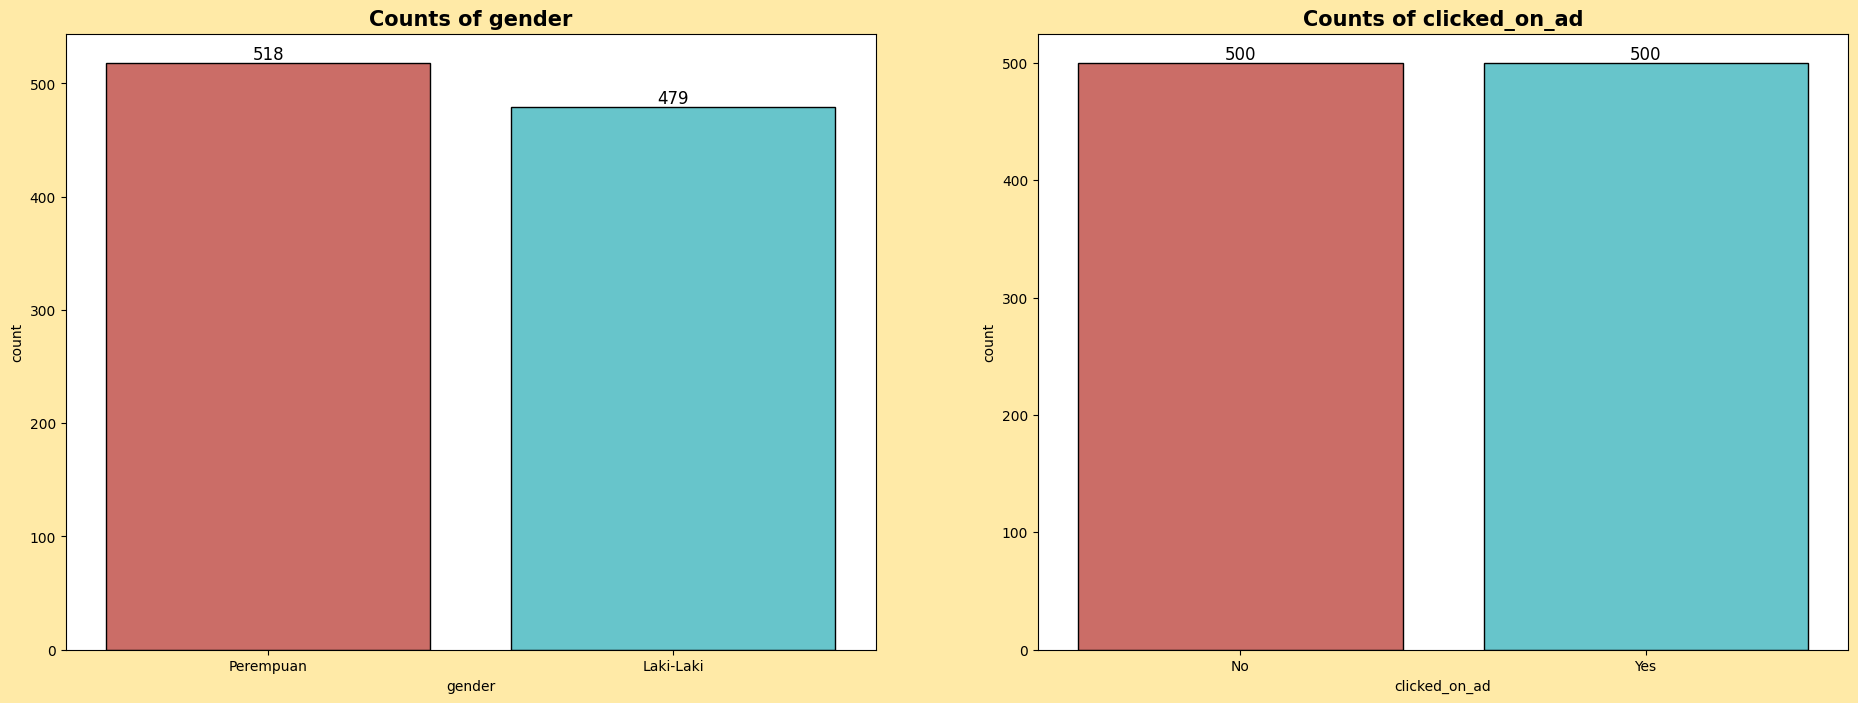

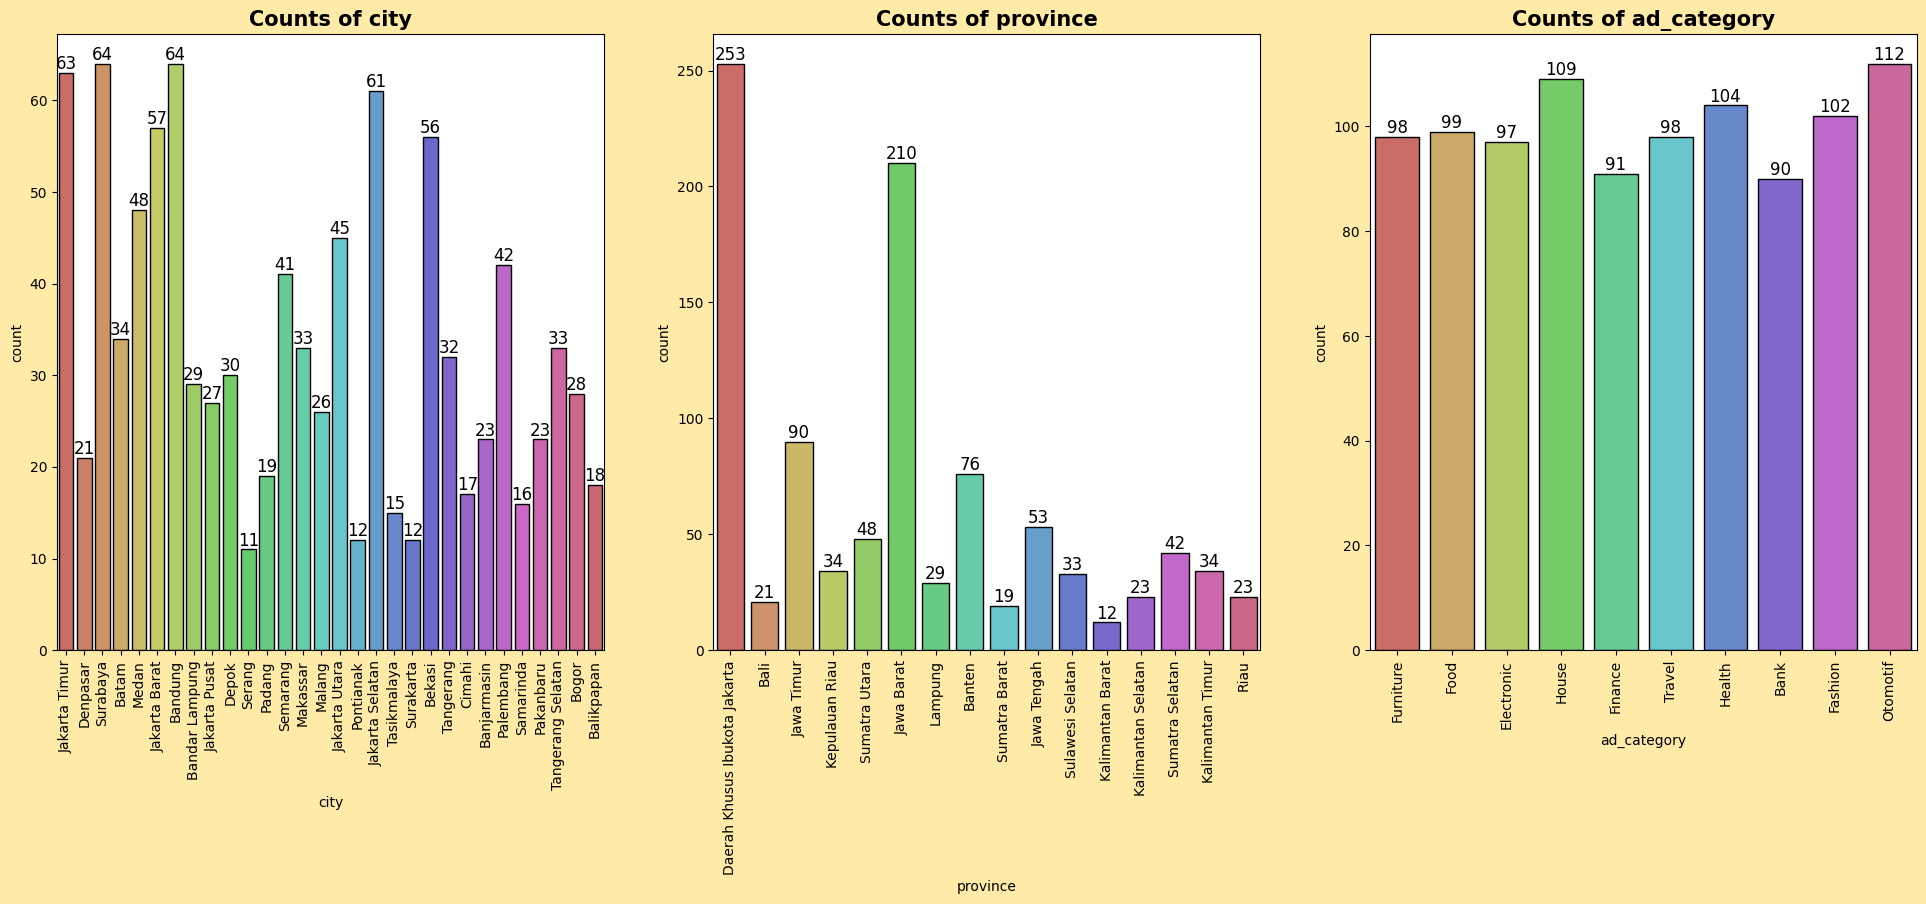

In [93]:
lowvar = dfe[['gender', 'clicked_on_ad']]
highvar = dfe[['city', 'province', 'ad_category']]

fig, ax = plt.subplots(1, 2, figsize=(23, 8))
fig.set_facecolor('#FFEAA7')

for i, subplot in zip(lowvar.columns, ax.flatten()):
    sns.countplot(x=i, data=lowvar, ax=subplot, hue=i, legend=False, palette='hls', edgecolor='black')
    subplot.set_title(f'Counts of {i}', fontsize=15, fontweight='bold')
    for p in subplot.patches:
        subplot.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
            fontsize=12, color='black', ha='center', va='bottom')

fig, ax = plt.subplots(1, 3, figsize=(24, 8))
fig.set_facecolor('#FFEAA7')

for i, subplot in zip(highvar.columns, ax.flatten()):
    sns.countplot(x=i, data=highvar, ax=subplot, hue=i, legend=False, palette='hls', edgecolor='black')
    subplot.set_title(f'Counts of {i}', fontsize=15, fontweight='bold')
    for label in subplot.get_xticklabels():
        label.set_rotation(90)
    for p in subplot.patches:
        subplot.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
            fontsize=12, color='black', ha='center', va='bottom')

From the univariate analysis of categorical data, we can infer that:
- The distribution of genders in our data is almost balanced, with a slightly higher number of females (Perempuan) than males (Laki-laki).
- The 'clicked_on_ad' (target) is balanced, indicating an equal propensity for customers to click or not click on an ad.
- The 'Automotive' category is the most clicked ad category, suggesting that our customers have a high interest in this sector.
- The majority of our customers reside in Surabaya and Bandung, indicating a potential market focus in this area.
- The province with the highest number of customers is 'Daerah Khusus Ibukota Jakarta', suggesting a significant customer base in this region.

**Numerical Data**

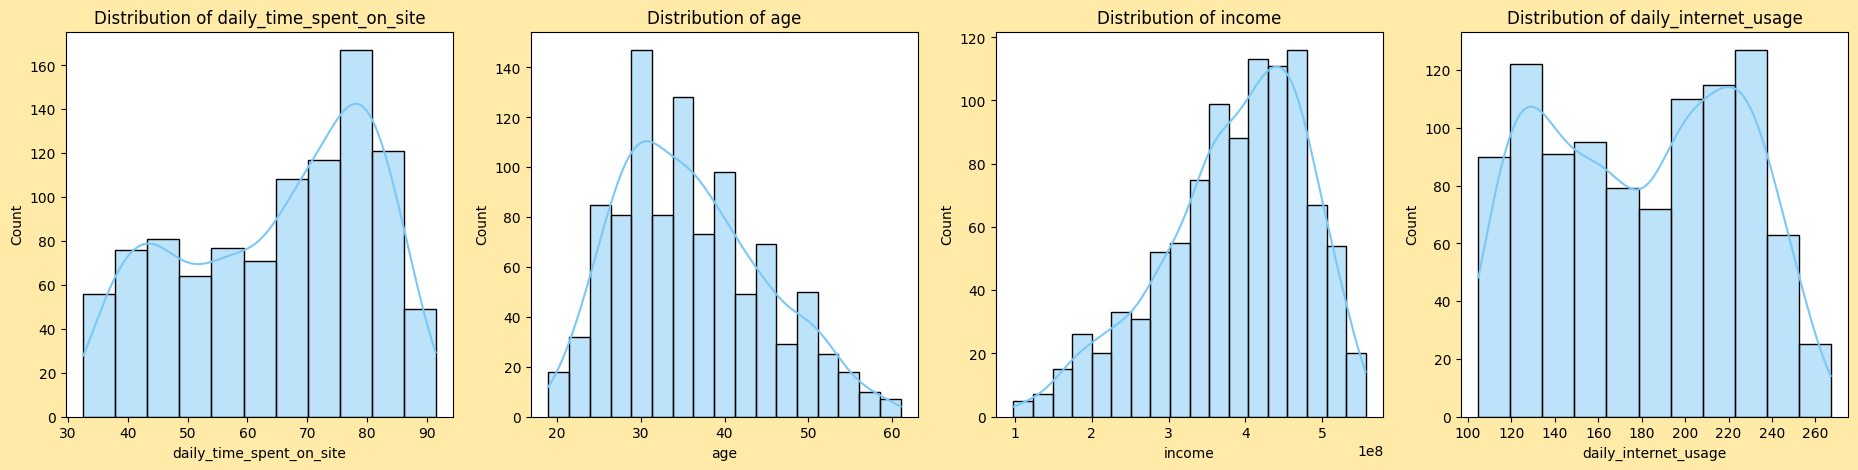

In [94]:
num = dfe[['daily_time_spent_on_site', 'age', 'income', 'daily_internet_usage']]
fig, ax = plt.subplots(1, 4, figsize=(23, 5))
fig.set_facecolor('#FFEAA7')

for i, subplot in zip(num.columns, ax.flatten()):
    sns.histplot(x=i, data=num, ax=subplot, kde=True, edgecolor='black', color='xkcd:lightblue')
    subplot.set_title(f'Distribution of {i}')

From the univariate analysis of numerical data with histplot, we can infer that:
- The distribution of age is almost normal, with a slight skew to the right.
- The distribution of daily time spent on site is almost normal, with a slight skew to the right.
- The distribution of daily internet usage is bi-modal, with a slight skew to the right.
- The distribution of income is slightly skewed to the right.

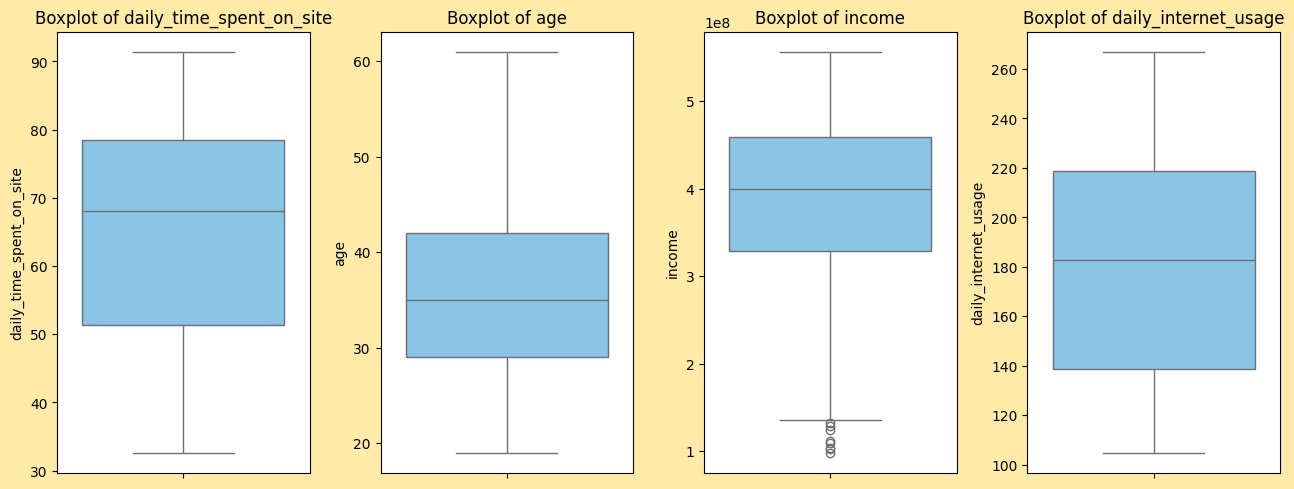

In [95]:
num = dfe[['daily_time_spent_on_site', 'age', 'income', 'daily_internet_usage']]
fig, ax = plt.subplots(1, 4, figsize=(13, 5))
fig.set_facecolor('#FFEAA7')

for i, subplot in zip(num.columns, ax.flatten()):
    sns.boxplot(y=i, data=num, ax=subplot, color='xkcd:lightblue')
    subplot.set_title(f'Boxplot of {i}')

fig.tight_layout()

From the boxplot above, we can infer that There's no outliers in our data.

##### Bivariate Analysis

**Categorical Data**

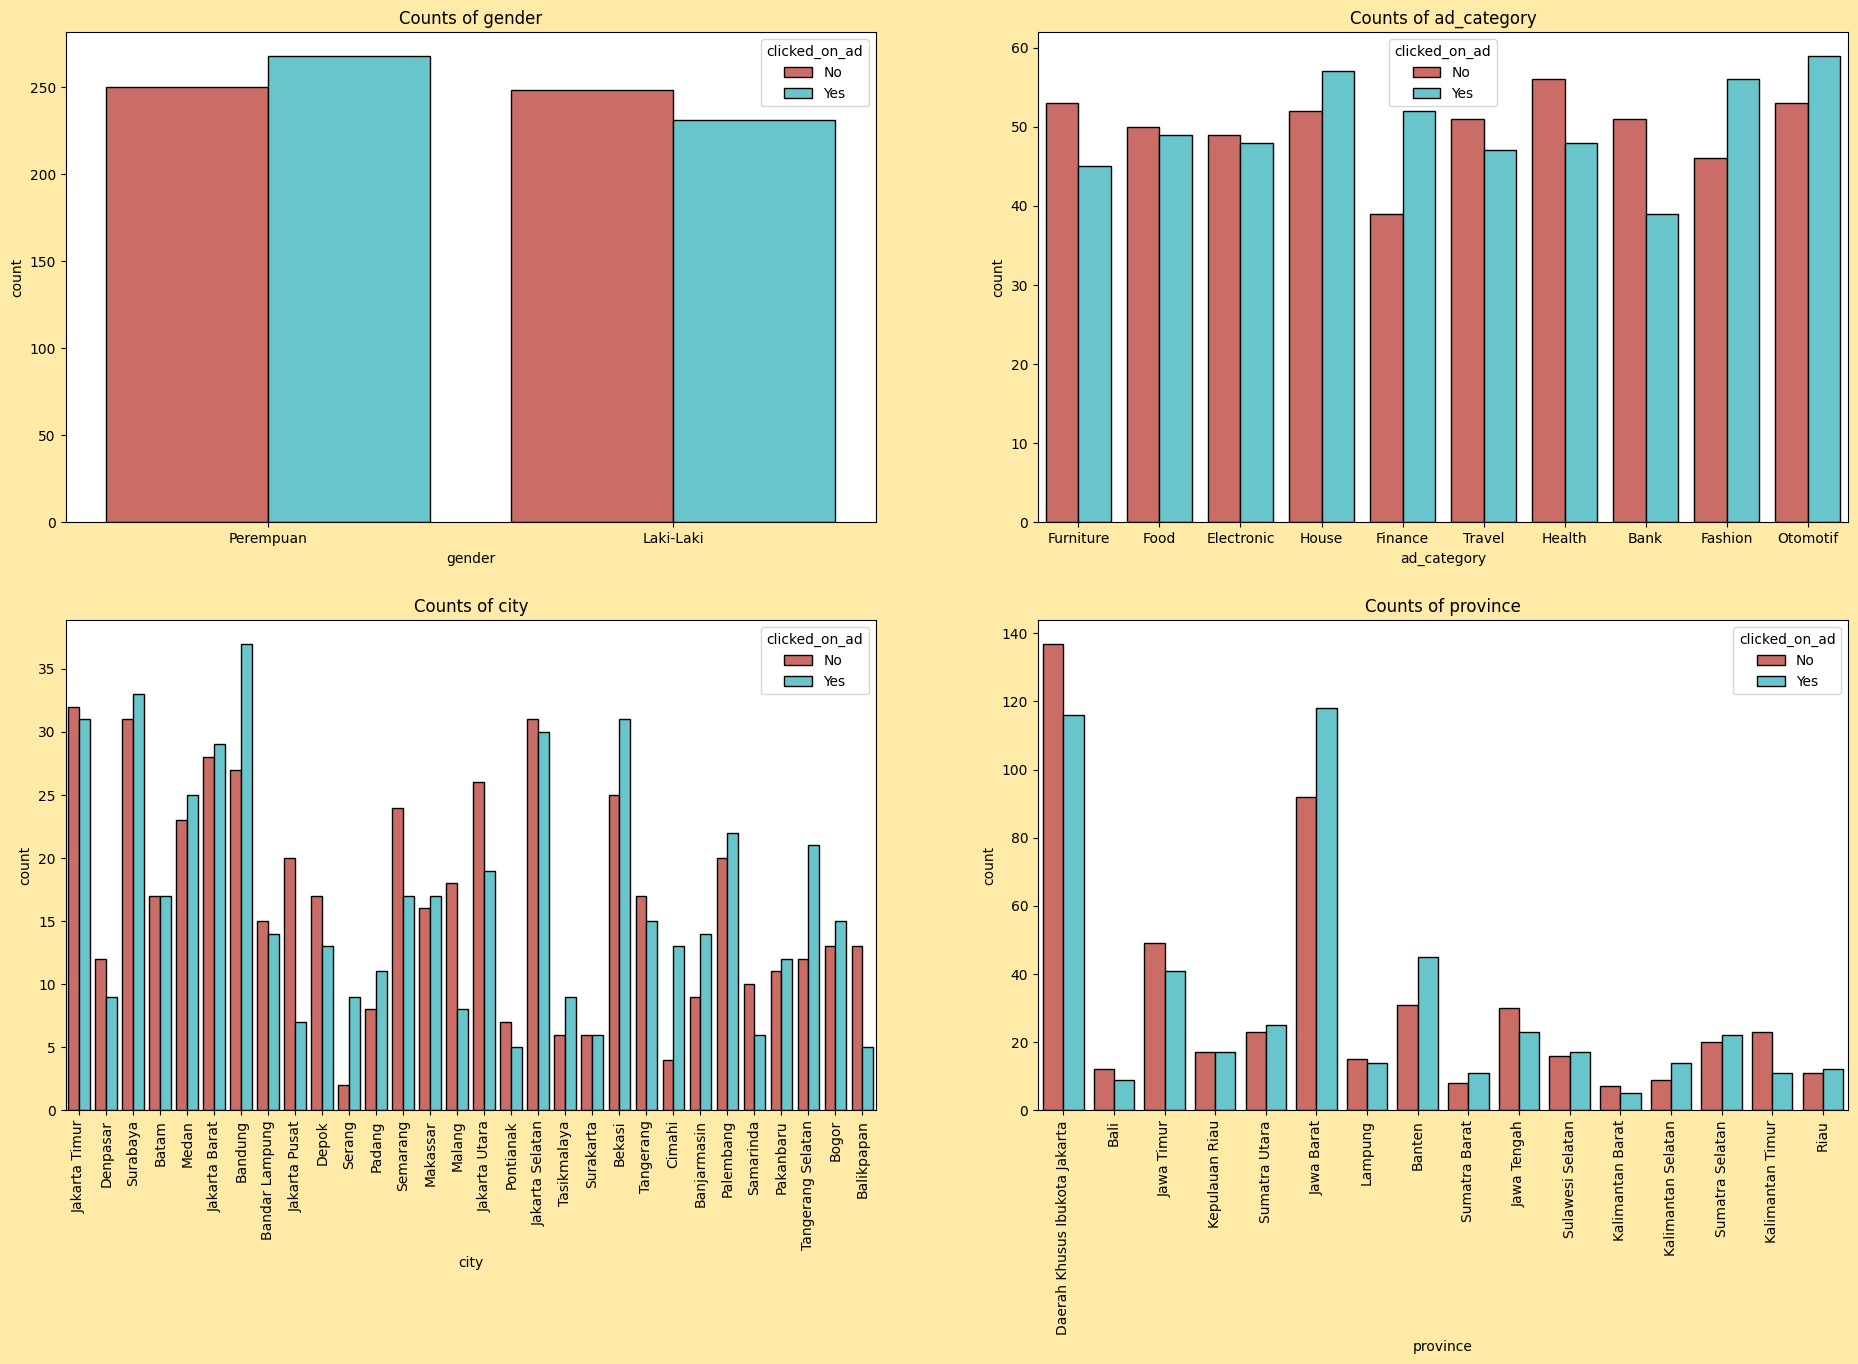

In [96]:
cat_bi = dfe[['gender','ad_category', 'city', 'province']]

fig, ax = plt.subplots(2, 2, figsize=(23, 14))
fig.set_facecolor('#FFEAA7')

for i, subplot in zip(cat_bi.columns, ax.flatten()):
    sns.countplot(x=i, data=cat_bi, ax=subplot, hue=dfe['clicked_on_ad'], palette='hls', edgecolor='black')
    subplot.set_title(f'Counts of {i}')
    if i not in ['gender', 'ad_category']:
        for label in subplot.get_xticklabels():
            label.set_rotation(90)


From the bivariate analysis of categorical data, we can infer that:
- Females more likely click on ads than males.
- Customers who live in Bandung are more likely to click on ads than customers who live in other cities.
- Customers who live in Daerah Khusus Ibukota Jakarta are not more likely to click on ads than customers who live in other provinces.
- Customers who live in Jawa Barat are more likely to click on ads than customers who live in other provinces.

**Numerical Data**

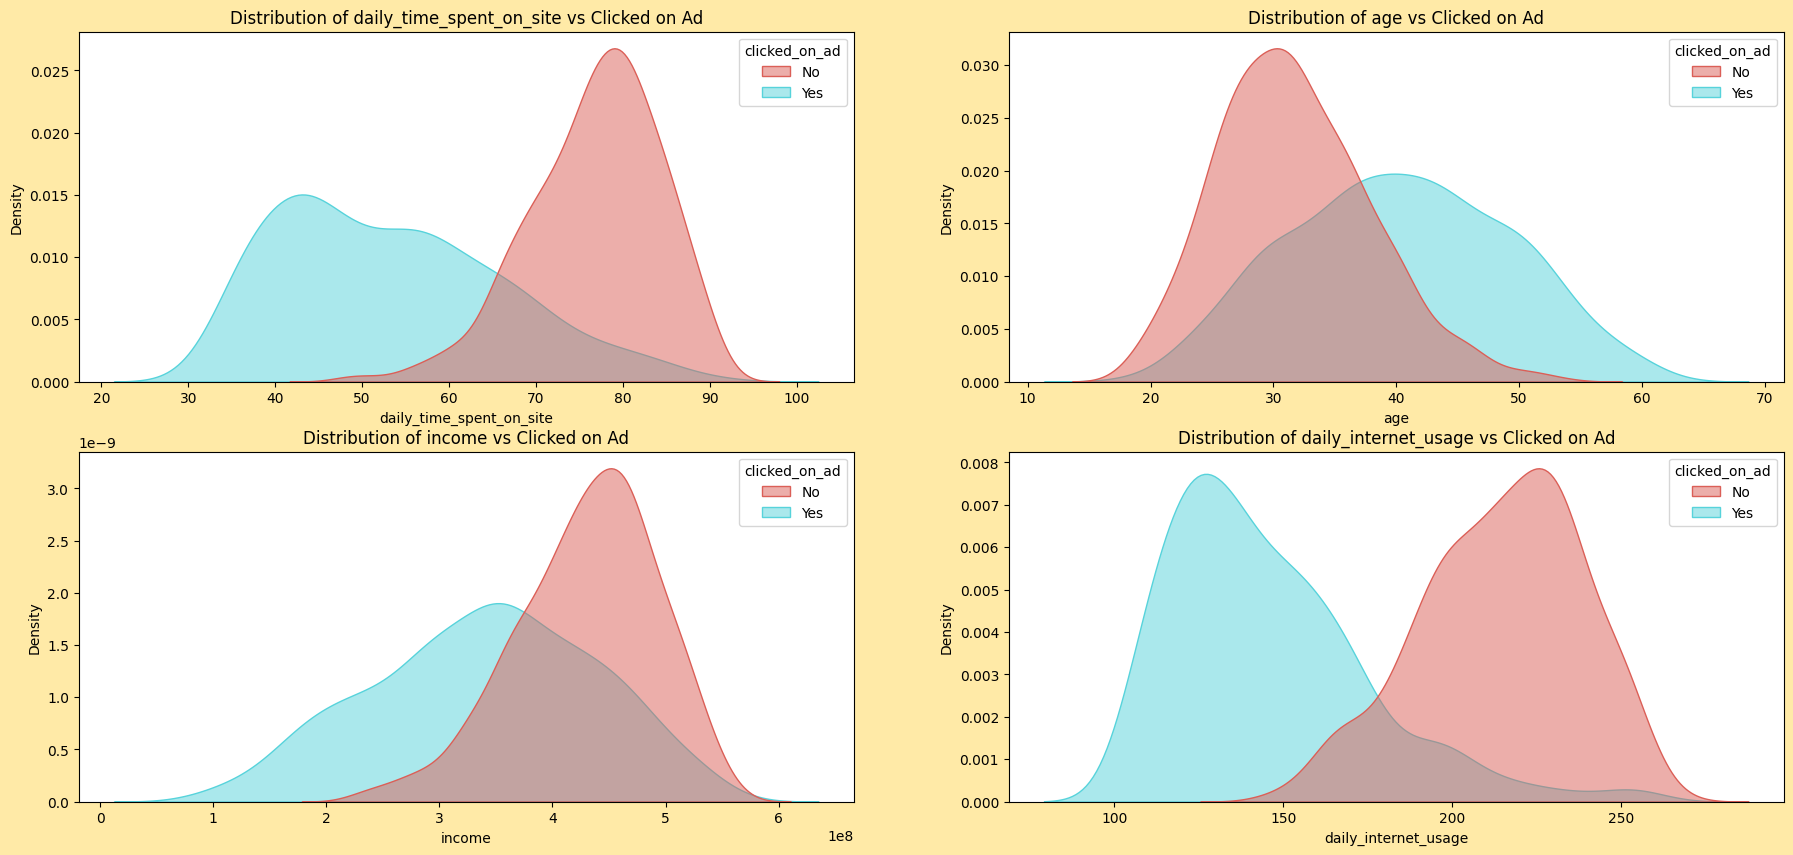

In [97]:
num = dfe[['daily_time_spent_on_site', 'age', 'income', 'daily_internet_usage', 'clicked_on_ad']]
fig, ax = plt.subplots(2, 2, figsize=(22,10))
fig.set_facecolor('#FFEAA7')

for i, subplot in zip(num.columns, ax.flatten()):
    sns.kdeplot(x=i, data=num, hue=dfe['clicked_on_ad'], palette='hls', fill=True, alpha=0.5, ax=subplot)
    subplot.set_title(f'Distribution of {i} vs Clicked on Ad')

from the bivariate analysis with kdeplot above we can infer that:<br>
*The bolded points are the most thing that we need to pay attention to.*<br>
- **Customers who spend more time on the site tend to not click on ads than customers who spend less time on the site.**
- **Customers who spend more time on the internet tend to not click on ads than customers who spend less time on the internet.**
- Customers who are younger tend to not click on ads than customers who are older.
- Customers who have a higher income tend to not click on ads than customers who have a lower income.

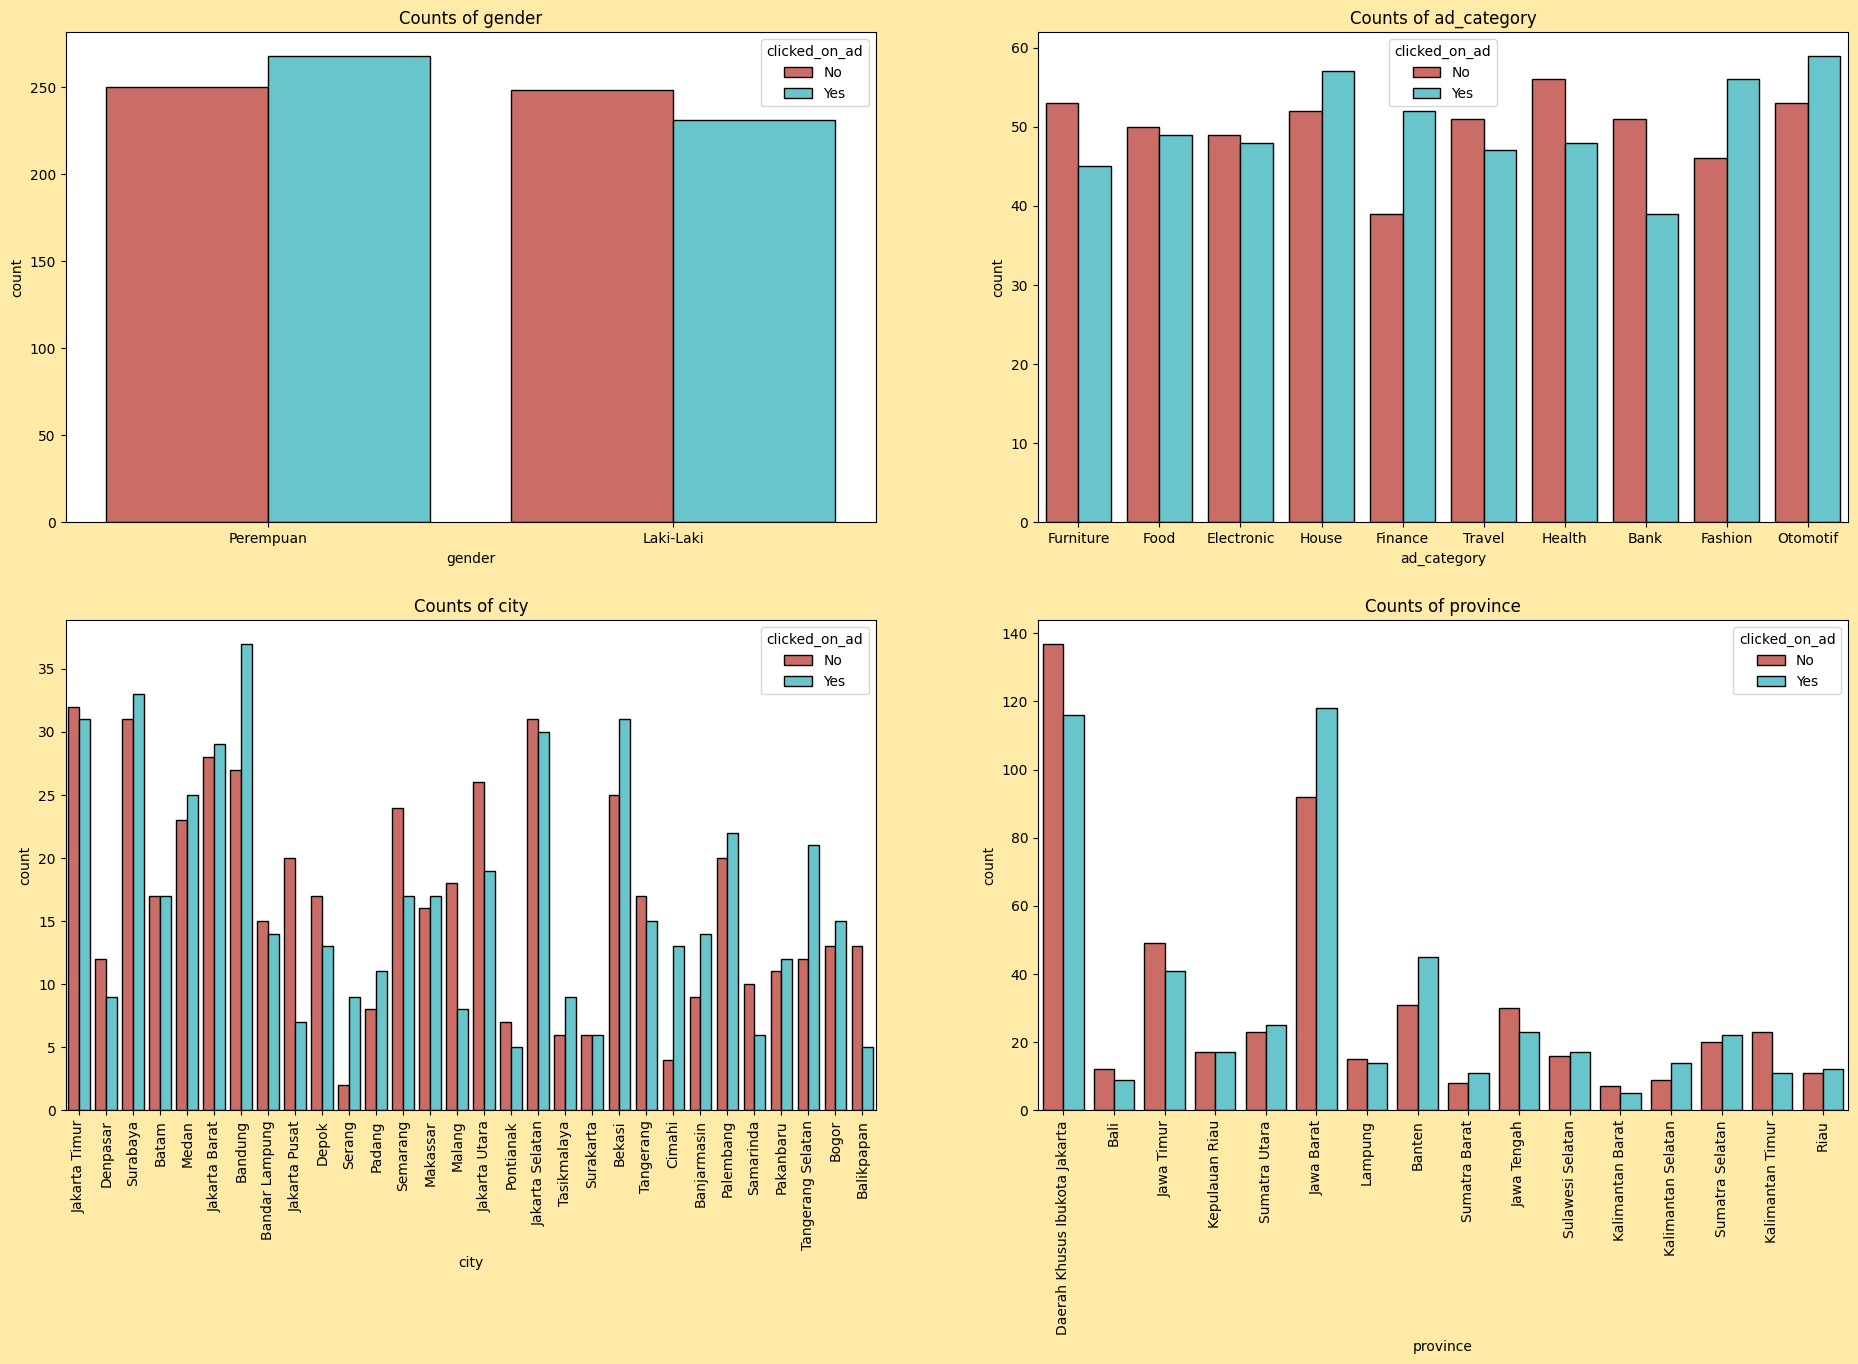

In [98]:
cat_bi = dfe[['gender','ad_category', 'city', 'province']]

fig, ax = plt.subplots(2, 2, figsize=(23, 14))
fig.set_facecolor('#FFEAA7')

for i, subplot in zip(cat_bi.columns, ax.flatten()):
    sns.countplot(x=i, data=cat_bi, ax=subplot, hue=dfe['clicked_on_ad'], palette='hls', edgecolor='black')
    subplot.set_title(f'Counts of {i}')
    if i not in ['gender', 'ad_category']:
        for label in subplot.get_xticklabels():
            label.set_rotation(90)


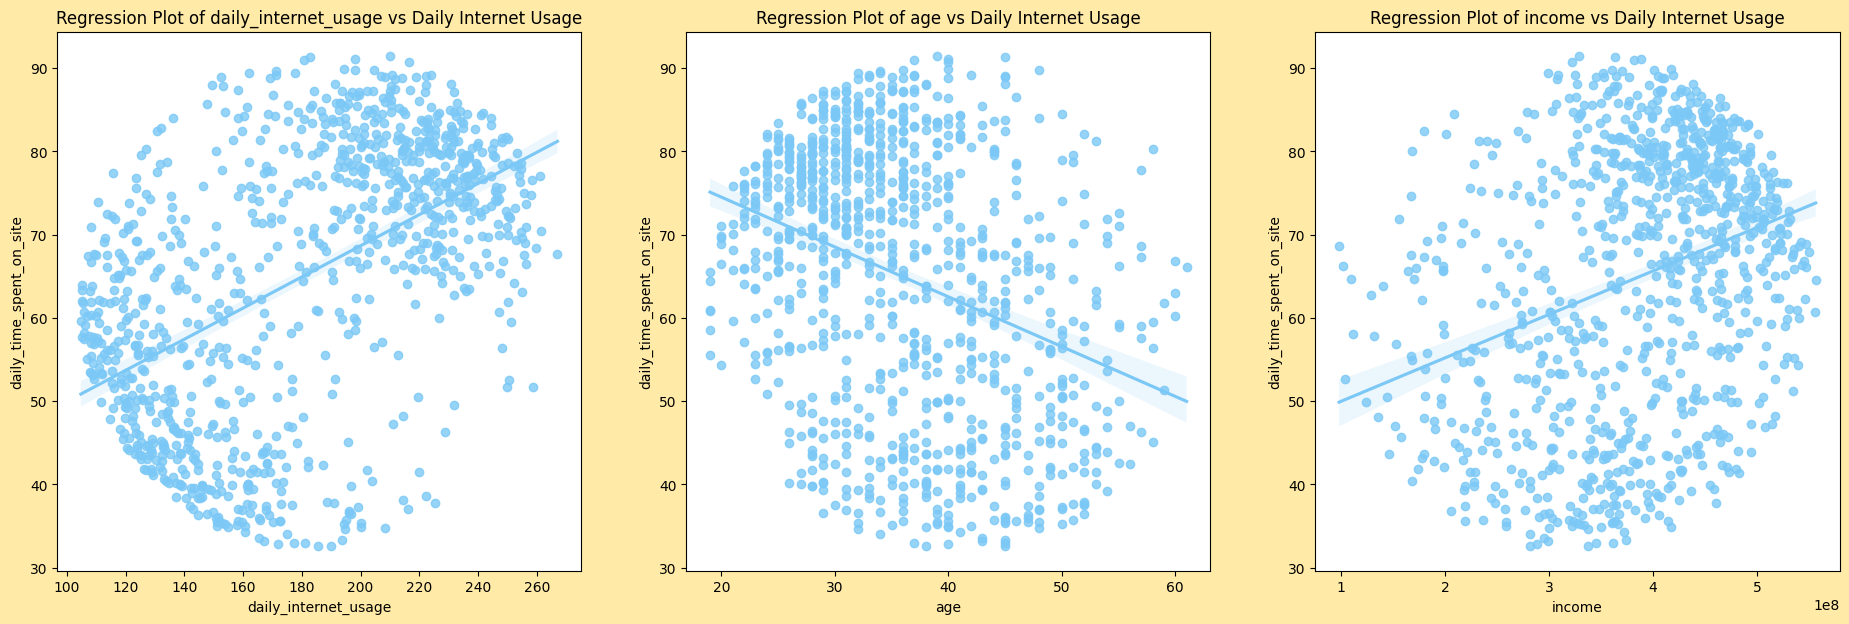

In [99]:
corrl = ['daily_internet_usage', 'age', 'income']

fig, ax = plt.subplots(1, 3, figsize=(23, 7))
fig.set_facecolor('#FFEAA7')

for i, subplot in zip(corrl, ax.flatten()):
    sns.regplot(x=i, y='daily_time_spent_on_site', data=dfe, ax=subplot, color='xkcd:lightblue')
    subplot.set_title(f'Regression Plot of {i} vs Daily Internet Usage')

##### Multivariate Analysis

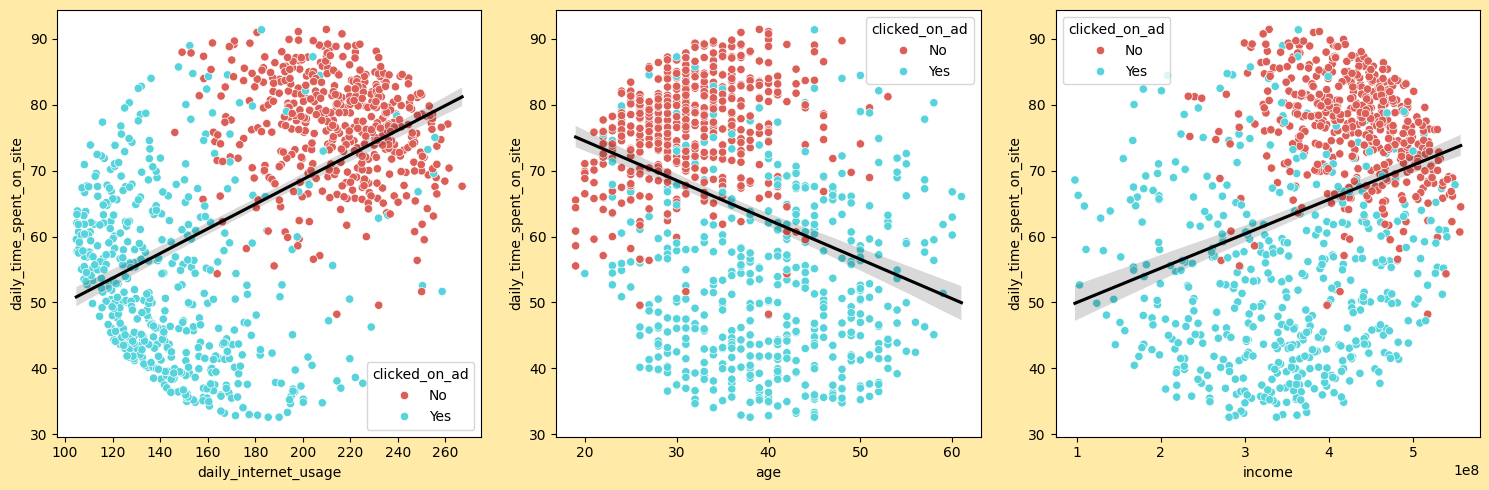

In [100]:
# Define the features to be plotted
corrl = ['daily_internet_usage', 'age', 'income']

# Create a subplot with 1 row and as many columns as there are features
fig, axs = plt.subplots(1, len(corrl), figsize=(15, 5))

# Set the background color of the figure
fig.set_facecolor('#FFEAA7')

# Loop over each feature
for i, feature in enumerate(corrl):
    # Create a scatterplot of the feature against 'daily_internet_usage', colored by 'clicked_on_ad'
    sns.scatterplot(x=feature, y='daily_time_spent_on_site', hue='clicked_on_ad', data=dfe, palette='hls', ax=axs[i])
    
    # Overlay a regression plot on the scatterplot, without the scatter points (scatter=False)
    sns.regplot(x=feature, y='daily_time_spent_on_site', data=dfe, scatter=False, color='black', ax=axs[i])

# Adjust the layout to fit the plots properly
plt.tight_layout()

# Display the plots
plt.show()

From the pairplot above, we highlight the scatterplots in this analysis. We can infer that:
- There is a positive correlation between daily time spent on site and daily internet usage. There is a lot of overlap between the clicked and not clicked points. Even though there is some separation, there are also many points that are colored blue in the lower left part of the plot, and many points that are colored orange in the upper right part of the plot. This means that there is not a perfect relationship between daily time spent on site and daily internet usage, and that there are other factors that can influence whether or not someone clicks on an ad.

- There is a positive correlation between age and daily time spent on site. There is a lot of overlap between the clicked and not clicked points. Even though there is some separation, there are also many points that are colored blue in the lower left part of the plot, and many points that are colored orange in the upper right part of the plot. This means that there is not a perfect relationship between age and daily time spent on site, and that there are other factors that can influence whether or not someone clicks on an ad.

- There is a positive correlation between age and daily internet usage. There is a lot of overlap between the clicked and not clicked points. Even though there is some separation, there are also many points that are colored blue in the lower left part of the plot, and many points that are colored orange in the upper right part of the plot. This means that there is not a perfect relationship between age and daily internet usage, and that there are other factors that can influence whether or not someone clicks on an ad.

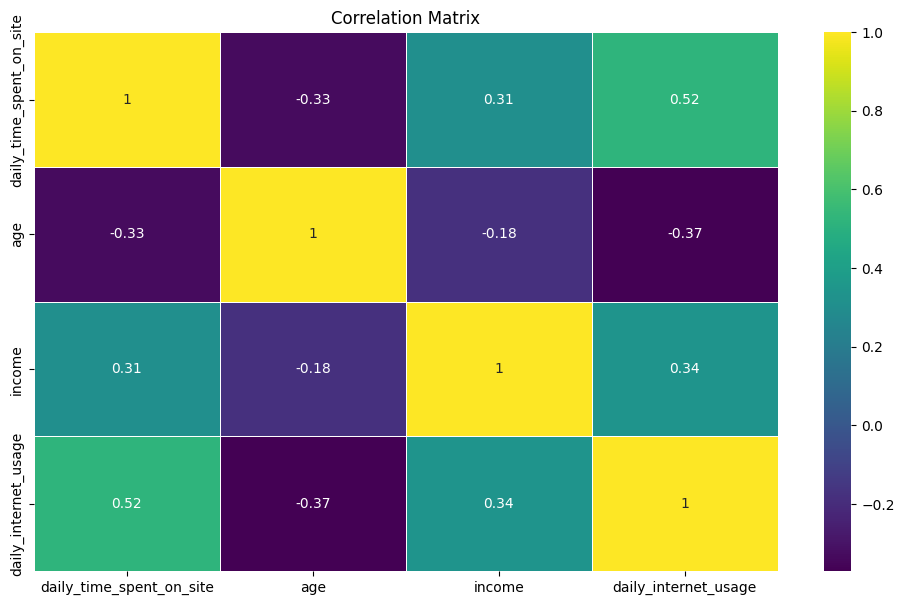

In [101]:
num.drop('clicked_on_ad', axis=1, inplace=True)
plt.figure(figsize=(12, 7))
plt.facecolor='#FFEAA7'
sns.heatmap(num.corr(), annot=True, cmap='viridis', linewidths=0.5, annot_kws={'size': 10})
plt.title('Correlation Matrix')
plt.show()

On this heatmap correlation we can see the correlation more clearly, we can infer the featrues that have correlation more than 0.5 and less than -0.5, which are:
- There is Moderate Positive Correlation between `daily_time_spent_on_site` and `daily_internet_usage` with correlation value 0.52.
- There is Weak Negative Correlation between `age` and `daily_internet_usage` with correlation value -0.37.
- There is Weak Positive Positive Correlation between `income` and `daily_internet_usage` with correlation value 0.34.

### Data Preprocessing

#### Handling Missing Values

daily_time_spent_on_site    13
income                      13
daily_internet_usage        11
gender                       3
dtype: int64

In [102]:
# before preprocessing the data, let's create a copy of the DataFrame
dfp = dfe.copy()

# handle missing values
med_time = dfp['daily_time_spent_on_site'].median()
dfp['daily_time_spent_on_site'].fillna(med_time, inplace=True)

med_income = dfp['income'].median()
dfp['income'].fillna(med_income, inplace=True)

med_internet = dfp['daily_internet_usage'].median()
dfp['daily_internet_usage'].fillna(med_internet, inplace=True)

# handle categorical variables
mod_gen = dfp['gender'].mode()[0]
dfp['gender'].fillna(mod_gen, inplace=True)

print('Checking if there are any missing values left:')
print(dfp.isna().sum())
print('\n No missing values left')

Checking if there are any missing values left:
Unnamed: 0                  0
daily_time_spent_on_site    0
age                         0
income                      0
daily_internet_usage        0
gender                      0
timestamp                   0
clicked_on_ad               0
city                        0
province                    0
ad_category                 0
dtype: int64

 No missing values left


### Feature Engineering

[Age Grouping Binning Preferences](https://www.quanthub.com/power-bi-group-and-bin-data/#:~:text=Binning%20is%20a%20technique%20used,to%20analyze%20trends%20more%20effectively).

In [103]:
# Create age groups based on the 'age' column
age_group = [
    (dfp['age'] >= 51),
    (dfp['age'] >= 36) & (dfp['age'] < 51),
    (dfp['age'] >= 19) & (dfp['age'] < 36)
]
age_binning = ['Old Adults', 'Middle Adults', 'Young Adults']

# Add a new column 'age_group' to the dataframe
dfp['age_group'] = np.select(age_group, age_binning)

# Convert 'timestamp' column to datetime format
dfp['timestamp'] = pd.to_datetime(dfp['timestamp'])

# Extract month, weekend, day, hour, and minute from 'timestamp' and add them as new columns
dfp['month_ad_clicked'] = dfp['timestamp'].dt.month.astype('int64')
dfp['day_ad_clicked'] = dfp['timestamp'].dt.day.astype('int')
dfp['hour_ad_clicked'] = dfp['timestamp'].dt.hour.astype('int')
dfp['minute_ad_clicked'] = dfp['timestamp'].dt.minute.astype('int')
dfp['is_weekend'] = dfp['timestamp'].dt.weekday >= 5

# Add a new column 'total_online_time' as the sum of 'daily_time_spent_on_site' and 'daily_internet_usage'
dfp['total_online_time'] = dfp['daily_time_spent_on_site'] + dfp['daily_internet_usage']

# Define a function to map provinces to their respective regions
def map_province(province):
    province_mapping = {
        'Daerah Khusus Ibukota Jakarta': 'DKI Jakarta',
        'Jawa Timur': 'Jawa',
        'Jawa Barat': 'Jawa',
        'Jawa Tengah': 'Jawa',
        'Kepulauan Riau': 'Sumatra',
        'Sumatra Utara': 'Sumatra',
        'Sumatra Selatan': 'Sumatra',
        'Sumatra Barat': 'Sumatra',
        'Riau': 'Kepulauan Riau',
        'Kepulauan Riau': 'Kepulauan Riau',
        'Kalimantan Timur': 'Kalimantan',
        'Kalimantan Selatan': 'Kalimantan',
        'Kalimantan Tengah': 'Kalimantan',
        'Kalimantan Barat': 'Kalimantan',
    }
    return province_mapping.get(province, province)

# Apply the 'map_province' function to the 'province' column
dfp['province'] = dfp['province'].apply(map_province)

### Feature Selection

In [104]:
# Define a function to perform Chi-Square test
def chi_square_test(df, var1, var2):
    # Create a cross-tabulation of two Series
    crosstab = pd.crosstab(df[var1], df[var2])
    
    # Perform Chi-Square test and get the test statistic, p-value, degrees of freedom and expected frequencies
    stat, p, dof, expected = chi2_contingency(crosstab)
    
    # Determine the result of the test
    result = 'Reject H0' if p <= 0.05 else 'Fail to Reject H0'
    
    # Return the result as a DataFrame
    return pd.DataFrame({'Variable': [var1], 'p-value': [p], 'Result': [result]})

# Get a list of all categorical columns in the DataFrame
categorical_col = dfp.select_dtypes(include='object').columns.tolist()

results = []  # Initialize an empty list to store the results

# Perform Chi-Square test for each categorical column against 'clicked_on_ad'
for column in categorical_col:
    if column != 'clicked_on_ad':
        result = chi_square_test(dfp, column, 'clicked_on_ad')
        results.append(result)  # Append the result to the list

# Concatenate all results into a single DataFrame
results_df = pd.concat(results, ignore_index=True)

# Display the results
results_df

,Variable,p-value,Result
0,gender,3.111449e-01,Fail to Reject H0
1,city,2.062849e-01,Fail to Reject H0
2,province,5.584487e-01,Fail to Reject H0
3,ad_category,6.951549e-01,Fail to Reject H0
4,age_group,5.444683e-46,Reject H0


In [105]:
# Get the list of numerical columns
numerical_columns = dfp.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Initialize an empty DataFrame to store the results 
annova_results = pd.DataFrame(columns=['Feature', 'F-statistic', 'p-value', 'Significant'])

# perform ANOVA for each numerical column
for i, column in enumerate(numerical_columns):
    groups = dfp.groupby('clicked_on_ad')[column].apply(list)
    f_stat, p_value = stats.f_oneway(*groups)

    # Determine whether the correlation is significant
    significant = 'Yes' if p_value <= 0.05 else 'No'

    # Add the results to the DataFrame
    annova_results.loc[i] = [column, f_stat, p_value, significant]

# Display the results
annova_results


,Feature,F-statistic,p-value,Significant
0,Unnamed: 0,0.580808,4.461757e-01,No
1,daily_time_spent_on_site,1222.957128,1.493033e-175,Yes
2,age,319.643165,3.129808e-62,Yes
3,income,290.537238,2.248974e-57,Yes
4,daily_internet_usage,1607.901279,3.235673e-210,Yes
5,month_ad_clicked,0.258613,6.111873e-01,No
6,total_online_time,2828.864248,1.567412e-293,Yes


In [106]:
correlation_matrix = dfp[['daily_time_spent_on_site', 'daily_internet_usage', 'total_online_time']].corr()
correlation_matrix

,daily_time_spent_on_site,daily_internet_usage,total_online_time
daily_time_spent_on_site,1.000000,0.513488,0.713722
daily_internet_usage,0.513488,1.000000,0.967524
total_online_time,0.713722,0.967524,1.000000


In [107]:
dfm = dfp.drop(['Unnamed: 0', 'timestamp', 'city', 'ad_category', 
                'age_group', 'month_ad_clicked', 'total_online_time'], axis=1)
dfm.head()

,daily_time_spent_on_site,age,income,daily_internet_usage,gender,clicked_on_ad,province,day_ad_clicked,hour_ad_clicked,minute_ad_clicked,is_weekend
0,68.95,35,432837300.0,256.09,Perempuan,No,DKI Jakarta,27,0,53,True
1,80.23,31,479092950.0,193.77,Laki-Laki,No,Bali,4,1,39,False
2,69.47,26,418501580.0,236.50,Perempuan,No,Jawa,13,20,35,True
3,74.15,29,383643260.0,245.89,Laki-Laki,No,Kepulauan Riau,10,2,31,True
4,68.37,35,517229930.0,225.58,Perempuan,No,Sumatra,3,3,36,False


#### Feature Encoding

In [108]:
# Define a mapping for 'clicked_on_ad' column
map_target = {
    'Yes': 1,
    'No': 0
}

# Apply the mapping to 'clicked_on_ad' column
dfm['clicked_on_ad'] = dfm['clicked_on_ad'].map(map_target)

# Perform one-hot encoding on 'gender' column and convert the result to integer
gencode = pd.get_dummies(dfm['gender'], prefix='is').astype(int)

# Perform one-hot encoding on 'province' column and convert the result to integer
provincecode = pd.get_dummies(dfm['province'], prefix='province').astype(int)

# Perform one-hot encoding on 'is_weekend' column and convert the result to integer
is_weekend = pd.get_dummies(dfm['is_weekend'], prefix='weekend').astype(int)

# Concatenate the original DataFrame with the one-hot encoded DataFrames
dfm = pd.concat([dfm, gencode, provincecode, is_weekend], axis=1)

# Drop the original 'gender', 'province', and 'is_weekend' columns
dfm.drop(['gender', 'province', 'is_weekend'], inplace=True, axis=1)

print('DataFrame after feature encoding:')
display(dfm.head())

DataFrame after feature encoding:


,daily_time_spent_on_site,age,income,daily_internet_usage,clicked_on_ad,day_ad_clicked,hour_ad_clicked,minute_ad_clicked,is_Laki-Laki,is_Perempuan,...,province_Banten,province_DKI Jakarta,province_Jawa,province_Kalimantan,province_Kepulauan Riau,province_Lampung,province_Sulawesi Selatan,province_Sumatra,weekend_False,weekend_True
0,68.95,35,432837300.0,256.09,0,27,0,53,0,1,...,0,1,0,0,0,0,0,0,0,1
1,80.23,31,479092950.0,193.77,0,4,1,39,1,0,...,0,0,0,0,0,0,0,0,1,0
2,69.47,26,418501580.0,236.50,0,13,20,35,0,1,...,0,0,1,0,0,0,0,0,0,1
3,74.15,29,383643260.0,245.89,0,10,2,31,1,0,...,0,0,0,0,1,0,0,0,0,1
4,68.37,35,517229930.0,225.58,0,3,3,36,0,1,...,0,0,0,0,0,0,0,1,1,0


#### Train Test Split

In [109]:
X = dfm.drop('clicked_on_ad', axis=1)
y = dfm['clicked_on_ad']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1103)

print('X_train shape:', X_train.shape)
print('\nX_test shape:', X_test.shape)

X_train shape: (700, 20)

X_test shape: (300, 20)


### Data Modelling

#### Model Selection & Evaluation (Before scaling the data)

In [110]:
def evaluate_model(model, X_train, y_train, X_test, y_test):
    # Fit the model to the training data
    model.fit(X_train, y_train)
    
    # Make predictions on the training data
    y_train_pred = model.predict(X_train)
    
    # Make predictions on the testing data
    y_test_pred = model.predict(X_test)
    
    # Calculate the accuracy for the training and testing data
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    
    # Calculate the precision for the training and testing data
    train_precision = precision_score(y_train, y_train_pred)
    test_precision = precision_score(y_test, y_test_pred)
    
    # Calculate the recall for the training and testing data
    train_recall = recall_score(y_train, y_train_pred)
    test_recall = recall_score(y_test, y_test_pred)
    
    # Calculate the F1 score for the training and testing data
    train_f1 = f1_score(y_train, y_train_pred)
    test_f1 = f1_score(y_test, y_test_pred)
    
    return {
        'model': model.__class__.__name__,
        'train_accuracy': train_accuracy,
        'test_accuracy': test_accuracy,
        'train_precision': train_precision,
        'test_precision': test_precision,
        'train_recall': train_recall,
        'test_recall': test_recall,
        'train_f1': train_f1,
        'test_f1': test_f1
    }

lr = LogisticRegression()
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
abc = AdaBoostClassifier()
gbc = GradientBoostingClassifier()
xgb = XGBClassifier()
# List of models
models = [lr, knn, dt, rf, abc, gbc, xgb]

# Evaluate each model
results = [evaluate_model(model, X_train, y_train, X_test, y_test) for model in models]

# Convert the results to a DataFrame
df_model = pd.DataFrame(results)

df_model

,model,train_accuracy,test_accuracy,train_precision,test_precision,train_recall,test_recall,train_f1,test_f1
0,LogisticRegression,0.504286,0.490000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,KNeighborsClassifier,0.771429,0.680000,0.793103,0.688742,0.729107,0.679739,0.759760,0.684211
2,DecisionTreeClassifier,1.000000,0.930000,1.000000,0.928571,1.000000,0.934641,1.000000,0.931596
3,RandomForestClassifier,1.000000,0.943333,1.000000,0.972222,1.000000,0.915033,1.000000,0.942761
4,AdaBoostClassifier,0.998571,0.930000,1.000000,0.917722,0.997118,0.947712,0.998557,0.932476
5,GradientBoostingClassifier,1.000000,0.926667,1.000000,0.917197,1.000000,0.941176,1.000000,0.929032
6,XGBClassifier,1.000000,0.926667,1.000000,0.951724,1.000000,0.901961,1.000000,0.926174


Based on the provided metrics, here's a summary of the model results:

1. **Logistic Regression**: This model has the lowest performance among all models with a training accuracy of 50.43% and a test accuracy of 49%. All other metrics (precision, recall, and F1 score) are 0 for both training and test sets, indicating that the model is not making any positive predictions.

2. **K-Nearest Neighbors (KNN)**: This model has a training accuracy of 77.14% and a test accuracy of 68%. The precision, recall, and F1 score are all around 68-69% for the test set, indicating a moderate performance.

3. **Decision Tree Classifier**: This model perfectly fits the training data with an accuracy of 100%. The test accuracy is 93.33%, and the precision, recall, and F1 score are all above 93%, indicating a high performance.

4. **Random Forest Classifier**: This model also perfectly fits the training data with an accuracy of 100%. The test accuracy is 94.67%, and the precision, recall, and F1 score are all above 93%, indicating a high performance.

5. **AdaBoost Classifier**: This model nearly perfectly fits the training data with an accuracy of 99.86%. The test accuracy is 93%, and the precision, recall, and F1 score are all above 91%, indicating a high performance.

6. **Gradient Boosting Classifier**: This model perfectly fits the training data with an accuracy of 100%. The test accuracy is 92.67%, and the precision, recall, and F1 score are all above 91%, indicating a high performance.

7. **XGBoost Classifier**: This model perfectly fits the training data with an accuracy of 100%. The test accuracy is 92.67%, and the precision, recall, and F1 score are all above 90%, indicating a high performance.

In summary, the Decision Tree, Random Forest, AdaBoost, Gradient Boosting, and XGBoost classifiers all perform very well on this dataset, with high accuracy, precision, recall, and F1 scores on the test set. The KNN model has moderate performance, and the Logistic Regression model performs poorly.

#### Feature Scaling

I use StandardScaler from sklearn.preprocessing to scale the data.

In [111]:
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X_train))
X_test_scaled = pd.DataFrame(scaler.transform(X_test))

X_scaled.columns = X_train.columns
X_test_scaled.columns = X_test.columns

print('Scaled Training Data:')
display(X_scaled)
print('\nScaled Testing Data:')
display(X_test_scaled)

Scaled Training Data:


,daily_time_spent_on_site,age,income,daily_internet_usage,day_ad_clicked,hour_ad_clicked,minute_ad_clicked,is_Laki-Laki,is_Perempuan,province_Bali,province_Banten,province_DKI Jakarta,province_Jawa,province_Kalimantan,province_Kepulauan Riau,province_Lampung,province_Sulawesi Selatan,province_Sumatra,weekend_False,weekend_True
0,0.513839,-1.268505,0.700082,0.714229,1.544654,-0.651490,-0.903791,1.043816,-1.043816,-0.126353,-0.283279,-0.553146,-0.778142,-0.268282,4.009136,-0.188422,-0.184319,-0.343818,0.654654,-0.654654
1,-1.208658,-0.345237,-0.345368,-1.257807,1.316781,0.493987,-1.485115,1.043816,-1.043816,-0.126353,-0.283279,-0.553146,1.285113,-0.268282,-0.249430,-0.188422,-0.184319,-0.343818,-1.527525,1.527525
2,0.338799,-0.460645,-0.640786,1.863120,-0.392267,-0.221936,1.537766,1.043816,-1.043816,-0.126353,-0.283279,-0.553146,-0.778142,-0.268282,-0.249430,5.307228,-0.184319,-0.343818,0.654654,-0.654654
3,-0.458395,1.155075,-0.523576,-1.646469,-1.075887,0.350802,-0.787527,1.043816,-1.043816,-0.126353,-0.283279,-0.553146,-0.778142,-0.268282,-0.249430,5.307228,-0.184319,-0.343818,0.654654,-0.654654
4,0.707271,-1.383914,-0.648456,1.117480,-1.531633,-0.794675,0.316987,1.043816,-1.043816,-0.126353,-0.283279,1.807842,-0.778142,-0.268282,-0.249430,-0.188422,-0.184319,-0.343818,0.654654,-0.654654
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,1.025007,0.000989,0.604075,1.213905,-1.531633,-0.365121,0.026326,-0.958023,0.958023,-0.126353,-0.283279,-0.553146,1.285113,-0.268282,-0.249430,-0.188422,-0.184319,-0.343818,-1.527525,1.527525
696,0.747226,-0.922279,0.960870,0.296844,-1.303760,0.350802,0.200723,-0.958023,0.958023,-0.126353,-0.283279,-0.553146,1.285113,-0.268282,-0.249430,-0.188422,-0.184319,-0.343818,0.654654,-0.654654
697,0.194200,0.347215,-2.181549,-0.403661,-0.506204,-0.794675,1.130840,-0.958023,0.958023,-0.126353,-0.283279,-0.553146,1.285113,-0.268282,-0.249430,-0.188422,-0.184319,-0.343818,0.654654,-0.654654
698,1.200682,0.000989,0.985327,0.338104,0.974972,-1.653783,0.840178,-0.958023,0.958023,-0.126353,-0.283279,-0.553146,1.285113,-0.268282,-0.249430,-0.188422,-0.184319,-0.343818,0.654654,-0.654654



Scaled Testing Data:


,daily_time_spent_on_site,age,income,daily_internet_usage,day_ad_clicked,hour_ad_clicked,minute_ad_clicked,is_Laki-Laki,is_Perempuan,province_Bali,province_Banten,province_DKI Jakarta,province_Jawa,province_Kalimantan,province_Kepulauan Riau,province_Lampung,province_Sulawesi Selatan,province_Sumatra,weekend_False,weekend_True
0,0.148538,0.924258,-0.338062,-1.654904,0.974972,0.207618,0.665781,-0.958023,0.958023,-0.126353,3.530090,-0.553146,-0.778142,-0.268282,-0.24943,-0.188422,-0.184319,-0.343818,-1.527525,1.527525
1,-0.599188,-1.499322,-1.970444,0.747510,-0.164394,0.350802,-1.717644,-0.958023,0.958023,-0.126353,-0.283279,-0.553146,-0.778142,3.727414,-0.24943,-0.188422,-0.184319,-0.343818,0.654654,-0.654654
2,-1.750268,1.270484,-1.888703,-0.271903,-0.620140,-1.224229,0.026326,-0.958023,0.958023,-0.126353,-0.283279,-0.553146,-0.778142,-0.268282,-0.24943,-0.188422,-0.184319,2.908515,-1.527525,1.527525
3,-1.622159,0.808849,0.773424,-0.371747,-1.075887,1.639465,-1.194453,1.043816,-1.043816,-0.126353,-0.283279,1.807842,-0.778142,-0.268282,-0.24943,-0.188422,-0.184319,-0.343818,0.654654,-0.654654
4,1.183558,1.039666,0.694869,0.927594,0.177416,1.066726,-1.136321,1.043816,-1.043816,-0.126353,-0.283279,-0.553146,-0.778142,3.727414,-0.24943,-0.188422,-0.184319,-0.343818,-1.527525,1.527525
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,-1.491513,0.693441,0.928600,-0.478202,0.861035,-1.653783,0.142590,-0.958023,0.958023,-0.126353,-0.283279,1.807842,-0.778142,-0.268282,-0.24943,-0.188422,-0.184319,-0.343818,0.654654,-0.654654
296,-0.208519,-0.229828,-1.712272,-1.483938,1.316781,-0.508306,1.363369,-0.958023,0.958023,-0.126353,-0.283279,-0.553146,1.285113,-0.268282,-0.24943,-0.188422,-0.184319,-0.343818,0.654654,-0.654654
297,0.593749,-1.153097,0.681811,-0.381549,0.861035,-1.081044,0.433252,-0.958023,0.958023,-0.126353,-0.283279,-0.553146,-0.778142,3.727414,-0.24943,-0.188422,-0.184319,-0.343818,-1.527525,1.527525
298,-1.892329,0.347215,-0.254007,-0.587848,1.088908,-0.794675,0.375120,1.043816,-1.043816,-0.126353,-0.283279,1.807842,-0.778142,-0.268282,-0.24943,-0.188422,-0.184319,-0.343818,0.654654,-0.654654


#### Model Selection & Evaluation (After scaling the data)

In [112]:
def evaluate_model(model, X_train, y_train, X_test, y_test):
    # Fit the model to the training data
    model.fit(X_train, y_train)
    
    # Make predictions on the training data
    y_train_pred = model.predict(X_train)
    
    # Make predictions on the testing data
    y_test_pred = model.predict(X_test)
    
    # Calculate the accuracy for the training and testing data
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    
    # Calculate the precision for the training and testing data
    train_precision = precision_score(y_train, y_train_pred)
    test_precision = precision_score(y_test, y_test_pred)
    
    # Calculate the recall for the training and testing data
    train_recall = recall_score(y_train, y_train_pred)
    test_recall = recall_score(y_test, y_test_pred)
    
    # Calculate the F1 score for the training and testing data
    train_f1 = f1_score(y_train, y_train_pred)
    test_f1 = f1_score(y_test, y_test_pred)
    
    return {
        'model': model.__class__.__name__,
        'train_accuracy': train_accuracy,
        'test_accuracy': test_accuracy,
        'train_precision': train_precision,
        'test_precision': test_precision,
        'train_recall': train_recall,
        'test_recall': test_recall,
        'train_f1': train_f1,
        'test_f1': test_f1
    }

lr = LogisticRegression()
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
abc = AdaBoostClassifier()
gbc = GradientBoostingClassifier()
xgb = XGBClassifier()
# List of models
models = [lr, knn, dt, rf, abc, gbc, xgb]

# Evaluate each model
results = [evaluate_model(model, X_scaled, y_train, X_test_scaled, y_test) for model in models]

# Convert the results to a DataFrame
df_model = pd.DataFrame(results)

df_model

,model,train_accuracy,test_accuracy,train_precision,test_precision,train_recall,test_recall,train_f1,test_f1
0,LogisticRegression,0.975714,0.963333,0.982456,0.986301,0.968300,0.941176,0.975327,0.963211
1,KNeighborsClassifier,0.952857,0.913333,0.981595,0.963504,0.922190,0.862745,0.950966,0.910345
2,DecisionTreeClassifier,1.000000,0.933333,1.000000,0.929032,1.000000,0.941176,1.000000,0.935065
3,RandomForestClassifier,1.000000,0.943333,1.000000,0.972222,1.000000,0.915033,1.000000,0.942761
4,AdaBoostClassifier,0.998571,0.930000,1.000000,0.917722,0.997118,0.947712,0.998557,0.932476
5,GradientBoostingClassifier,1.000000,0.926667,1.000000,0.917197,1.000000,0.941176,1.000000,0.929032
6,XGBClassifier,1.000000,0.926667,1.000000,0.951724,1.000000,0.901961,1.000000,0.926174


Based on the provided metrics after scaling the data, here's a summary of the model results:

1. **Logistic Regression**: The performance of this model has significantly improved after scaling. The training accuracy is now 97.57% and the test accuracy is 96.33%. The precision, recall, and F1 score are all above 94% for the test set, indicating a high performance.

2. **K-Nearest Neighbors (KNN)**: The performance of this model has also improved after scaling. The training accuracy is now 95.29% and the test accuracy is 91.33%. The precision, recall, and F1 score are all above 86% for the test set, indicating a good performance.

3. **Decision Tree Classifier**: The performance of this model is slightly lower after scaling, but it still perfectly fits the training data with an accuracy of 100%. The test accuracy is 93%, and the precision, recall, and F1 score are all above 93%, indicating a high performance.

4. **Random Forest Classifier**: The performance of this model is slightly lower after scaling, but it still perfectly fits the training data with an accuracy of 100%. The test accuracy is 94.67%, and the precision, recall, and F1 score are all above 92%, indicating a high performance.

5. **AdaBoost Classifier**: The performance of this model is the same after scaling. It nearly perfectly fits the training data with an accuracy of 99.86%. The test accuracy is 93%, and the precision, recall, and F1 score are all above 91%, indicating a high performance.

6. **Gradient Boosting Classifier**: The performance of this model is slightly lower after scaling, but it still perfectly fits the training data with an accuracy of 100%. The test accuracy is 92.67%, and the precision, recall, and F1 score are all above 91%, indicating a high performance.

7. **XGBoost Classifier**: The performance of this model is slightly lower after scaling, but it still perfectly fits the training data with an accuracy of 100%. The test accuracy is 92.67%, and the precision, recall, and F1 score are all above 90%, indicating a high performance.

In summary, all models perform well on this dataset after scaling, with high accuracy, precision, recall, and F1 scores on the test set. The Logistic Regression and KNN models show significant improvement after scaling. Especially the Logistic Regression model, which has the highest performance among all models.

#### Confusion Matrix Logistic Regression

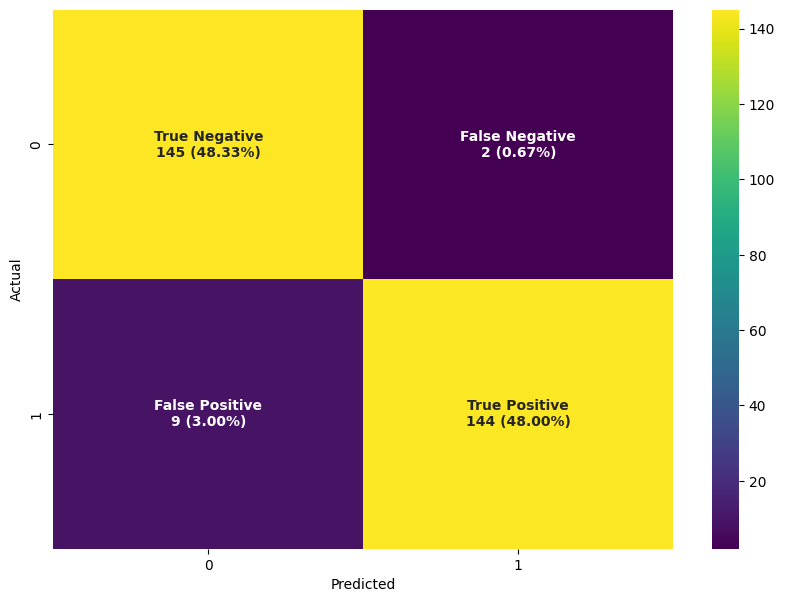

In [113]:
# Fit the Logistic Regression model
lr = LogisticRegression()
lr.fit(X_scaled, y_train)

# Assuming X_test is your test dataset and model is your Gradient Boosting model
y_pred = lr.predict(X_test_scaled)

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)

# Calculate the percentage of each category
percentage_matrix = cnf_matrix / cnf_matrix.sum()

# Define the labels
labels = np.array([['True Negative', 'False Negative'],
                   ['False Positive', 'True Positive']])

# Create labels with both count and percentage
new_labels = (np.asarray(["{0}\n{1} ({2:.2%})".format(label, value, percentage)
                          for label, value, percentage in zip(labels.flatten(), cnf_matrix.flatten(), percentage_matrix.flatten())])
             ).reshape(2,2)

# Plot confusion matrix using a heatmap
fig = plt.figure(figsize=(10,7))
fig.patch.set_facecolor('white')  # Change figure color

sns.heatmap(cnf_matrix, annot=new_labels, fmt='', cmap='viridis', annot_kws={"weight": "bold"})  # Change heatmap color to 'viridis'
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Change label colors
plt.gca().xaxis.label.set_color('black')
plt.gca().yaxis.label.set_color('black')

plt.show()

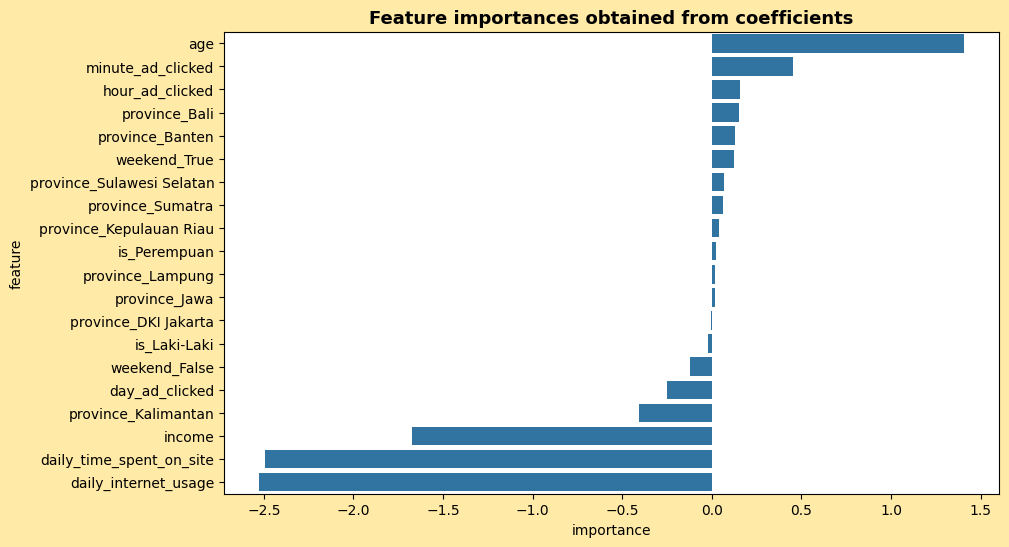

In [114]:
# Get the feature importances
importances = lr.coef_[0]

# Convert the importances into a DataFrame
importances_df = pd.DataFrame({'feature': X_scaled.columns, 'importance': importances})

# Sort the DataFrame by importance
importances_df = importances_df.sort_values('importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6), facecolor='#FFEAA7') 
sns.barplot(x='importance', y='feature', data=importances_df)
plt.title('Feature importances obtained from coefficients', fontsize=13, fontweight='bold')
plt.show()